# Aula 1: Feature Engineering

## Transformação de dados
- Mudanças de escala
- Normalização e padronização 
- Transformação log
- Binning e One-hot-encoding
- Processando datas

## Importings

In [52]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from pycaret.datasets import get_data

In [49]:
df = pd.read_csv('AtrasoCartaoCredito.csv')

### Mudanças de escala

In [45]:
df_tips = sns.load_dataset('tips')

### Normalização e padronização 

![](http://androidkt.com/wp-content/uploads/2020/10/Selection_060.png)

In [ ]:
minmax

![](https://www.simplypsychology.org/Z-score-formula.jpg)

### Transformação log

![](https://image.slidesharecdn.com/4-140505141858-phpapp01/95/4transformations-10-638.jpg?cb=1399299626)

In [50]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333


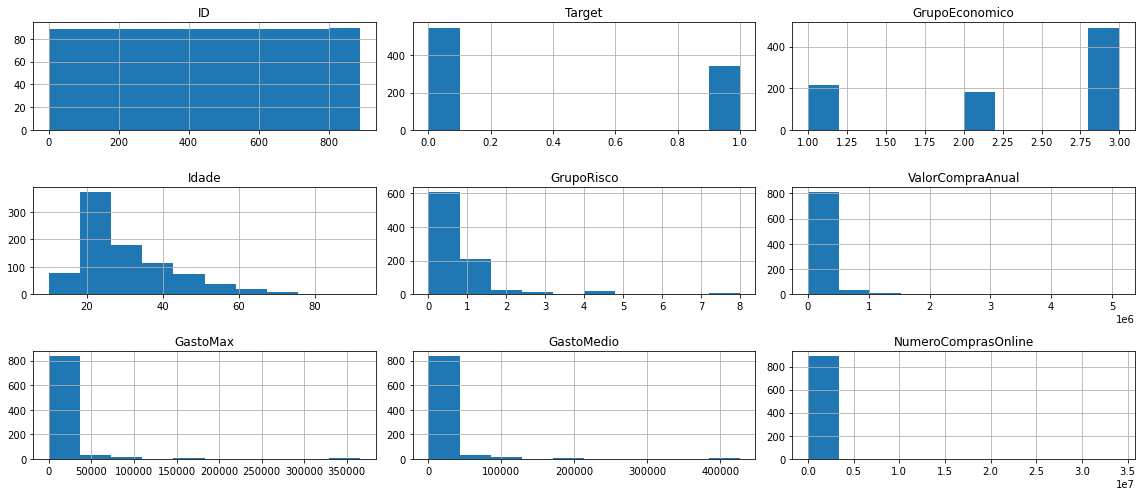

In [54]:
df.hist(figsize=(16, 7))
plt.tight_layout();

In [56]:
df['GastoMedio_log'] = np.log(df['GastoMedio'])

C:\Users\milto\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
df['GastoMedio_log'].min()

-inf

In [58]:
df['GastoMedio_log'] = np.log(df['GastoMedio']+1)

In [59]:
df['GastoMedio_log'].min()

0.0

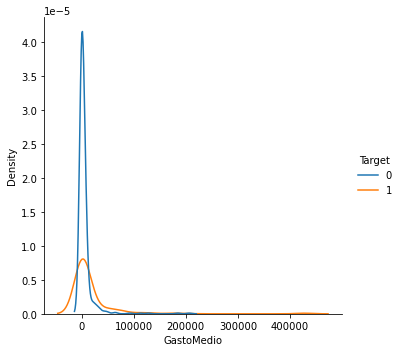

In [83]:
sns.displot(data=df, x='GastoMedio', hue='Target', kind='kde');

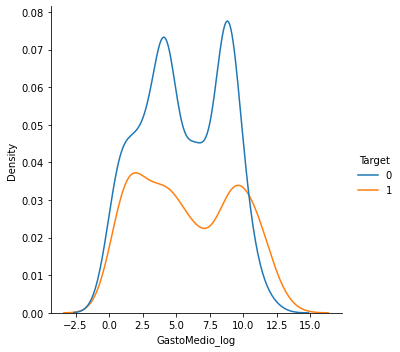

In [84]:
sns.displot(data=df, x='GastoMedio_log', hue='Target', kind='kde');

In [90]:
df['GastoMedio_sqrt'] = df['GastoMedio'].apply(lambda x: x**(0.5))

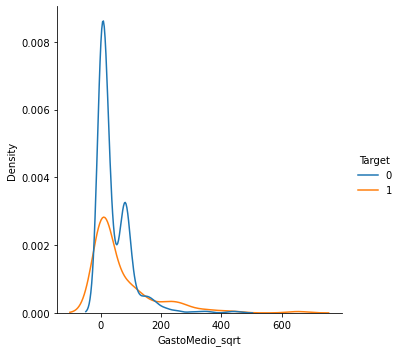

In [91]:
sns.displot(data=df, x='GastoMedio_sqrt', hue='Target', kind='kde');

### Binning e One-hot-encoding

![](https://ichi.pro/assets/images/max/724/1*ieFTW63rKI2IyWBP-BU0JQ.png)

### mean encoding

In [92]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,GastoMedio_log,GastoMedio_sqrt
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,6.405504,24.579802
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,8.689675,77.073017
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,6.494384,25.698573
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,3.812203,6.652067
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,4.220732,8.190442


In [93]:
mean_grupo_eco = df.groupby('GrupoEconomico')['Target'].mean().to_dict()

In [94]:
mean_grupo_eco

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

In [95]:
df['GrupoEconomico_me'] = df['GrupoEconomico'].map(mean_grupo_eco)

In [96]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,GastoMedio_log,GastoMedio_sqrt,GrupoEconomico_me
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,6.405504,24.579802,0.242363
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,8.689675,77.073017,0.629630
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,6.494384,25.698573,0.242363
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,3.812203,6.652067,0.629630
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,4.220732,8.190442,0.242363


### category encoder

https://medium.com/datarisk-io/como-melhor-tratar-vari%C3%A1veis-categ%C3%B3ricas-para-modelos-de-machine-learning-parte-1-a0e3a946bb1e

In [97]:
from category_encoders import JamesSteinEncoder

In [98]:
james = JamesSteinEncoder(cols=['GrupoEconomico'])

In [101]:
x = df[['GrupoEconomico']].copy()
y = df['Target']

In [102]:
x_james = james.fit_transform(x, y)

C:\Users\milto\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [103]:
x_james

,GrupoEconomico
0,0.242363
1,0.629630
2,0.242363
3,0.629630
4,0.242363
...,...
886,0.472826
887,0.629630
888,0.242363
889,0.629630


### Pipeline

![](https://ichi.pro/assets/images/max/724/1*ONryJuHGGUZ6PUmYTMiFxQ.png)

![](https://iaml.it/blog/optimizing-sklearn-pipelines/images/pipeline-diagram.png)

### Processando datas

In [8]:
dia = datetime(2021, 8, 31)

In [10]:
dia

datetime.datetime(2021, 8, 31, 0, 0)

In [9]:
dia.weekday()

1

#### Timestamp

In [11]:
timestamp = pd.Timestamp(dia)

In [12]:
timestamp.day_name()

'Tuesday'

#### Period

In [15]:
period = pd.Period('2020-05-11')
period

Period('2020-05-11', 'D')

In [16]:
period + 1

Period('2020-05-12', 'D')

#### Date_range

In [13]:
index = pd.date_range('2020-01-01', periods=12, freq='M')
index

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
index.to_period()

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]', freq='M')

#### Exemplo

In [19]:
df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [21]:
df_flights.shape

(144, 3)

In [20]:
index_flights = pd.date_range('1949-01', periods=144, freq='M')

In [22]:
df_flights.set_index(index_flights.to_period(), inplace=True)

In [23]:
df_flights.head()

,year,month,passengers
1949-01,1949,Jan,112
1949-02,1949,Feb,118
1949-03,1949,Mar,132
1949-04,1949,Apr,129
1949-05,1949,May,121


In [24]:
df_flights.drop(['year', 'month'], axis=1, inplace=True)

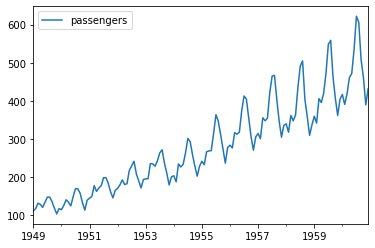

In [25]:
df_flights.plot()

#### Converter datetime

In [105]:
df_sim = pd.DataFrame({'data_br':['25/04/2020','26/04/2020','27/04/2020'],
                       'data_us':['04/25/2020','04/26/2020','04/27/2020'],
                       'value':[10, 50, 80]})
df_sim

,data_br,data_us,value
0,25/04/2020,04/25/2020,10
1,26/04/2020,04/26/2020,50
2,27/04/2020,04/27/2020,80


In [107]:
df_sim = pd.DataFrame({'data_br':['25-2020-04','26-2020-04','27-2020-04'],
                       'data_us':['04/25/2020','04/26/2020','04/27/2020'],
                       'value':[10, 50, 80]})
df_sim

,data_br,data_us,value
0,25-2020-04,04/25/2020,10
1,26-2020-04,04/26/2020,50
2,27-2020-04,04/27/2020,80


In [108]:
pd.to_datetime(df_sim['data_us'])

0   2020-04-25
1   2020-04-26
2   2020-04-27
Name: data_us, dtype: datetime64[ns]

In [109]:
df_sim['data_br'] = pd.to_datetime(df_sim['data_br'], format='%d-%Y-%m')

In [110]:
df_sim

,data_br,data_us,value
0,2020-04-25,04/25/2020,10
1,2020-04-26,04/26/2020,50
2,2020-04-27,04/27/2020,80
